In [36]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline

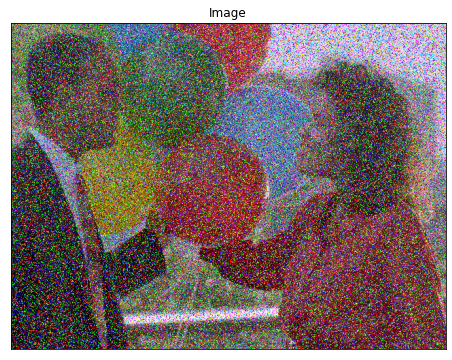

In [37]:
image = cv2.imread('balloons_noisy.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(11,6))
plt.imshow(image)
plt.title('Image')
plt.xticks([])
plt.yticks([])
plt.show()

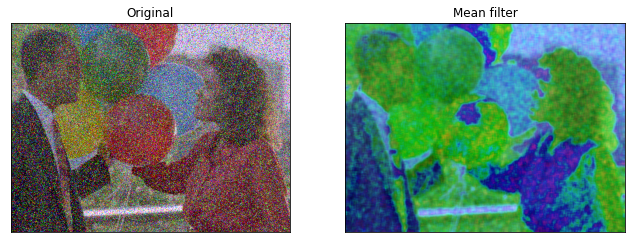

In [38]:
image = cv2.imread('balloons_noisy.png')
 # reads the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # convert to HSV
figure_size = 9 # the dimension of the x and y axis of the kernal.
new_image = cv2.blur(image,(figure_size, figure_size))

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

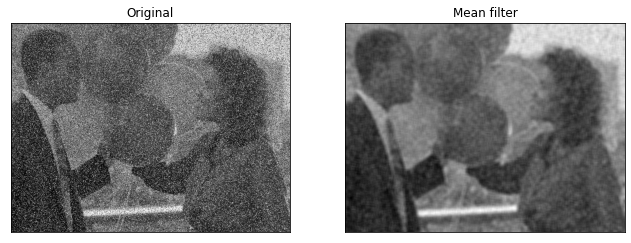

In [39]:
# The image will first be converted to grayscale
image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
figure_size = 9
new_image = cv2.blur(image2,(figure_size, figure_size))

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

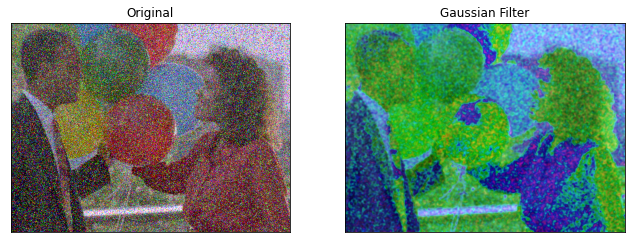

In [40]:
new_image = cv2.GaussianBlur(image, (figure_size, figure_size),0)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

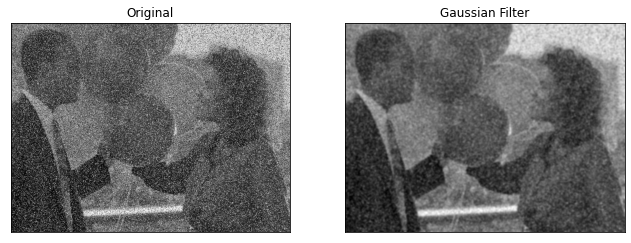

In [41]:
new_image_gauss = cv2.GaussianBlur(image2, (figure_size, figure_size),0)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image_gauss, cmap='gray'),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

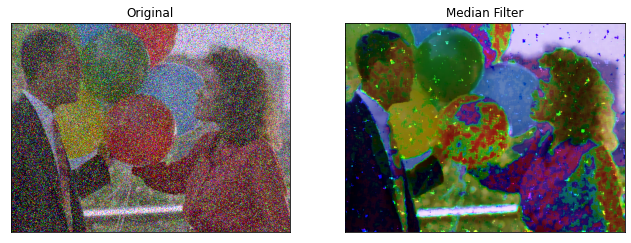

In [42]:
new_image = cv2.medianBlur(image, figure_size)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

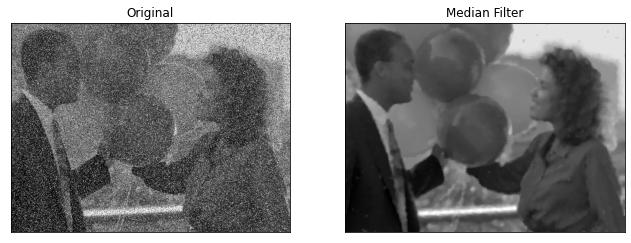

In [43]:
new_image = cv2.medianBlur(image2, figure_size)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

In [44]:
# first a conservative filter for grayscale images will be defined.
def conservative_smoothing_gray(data, filter_size):
    temp = []
    indexer = filter_size // 2
    new_image = data.copy()
    nrow, ncol = data.shape
    for i in range(nrow):
        for j in range(ncol):
            for k in range(i-indexer, i+indexer+1):
                for m in range(j-indexer, j+indexer+1):
                    if (k > -1) and (k < nrow):
                        if (m > -1) and (m < ncol):
                            temp.append(data[k,m])
            temp.remove(data[i,j])
            max_value = max(temp)
            min_value = min(temp)
            if data[i,j] > max_value:
                new_image[i,j] = max_value
            elif data[i,j] < min_value:
                new_image[i,j] = min_value
            temp =[]
    return new_image.copy()

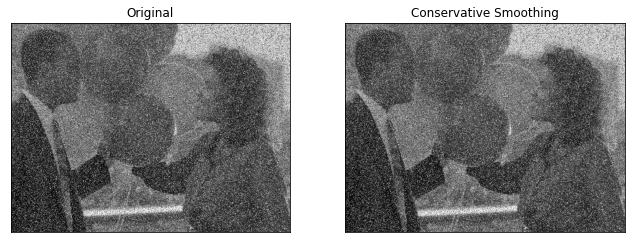

In [45]:
new_image = conservative_smoothing_gray(image2,9)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Conservative Smoothing')
plt.xticks([]), plt.yticks([])
plt.show()

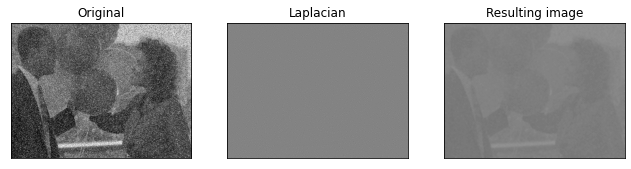

In [46]:
new_image = cv2.Laplacian(image2,cv2.CV_64F)

plt.figure(figsize=(11,6))
plt.subplot(131), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(new_image, cmap='gray'),plt.title('Laplacian')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(image2 + new_image, cmap='gray'),plt.title('Resulting image')
plt.xticks([]), plt.yticks([])
plt.show()

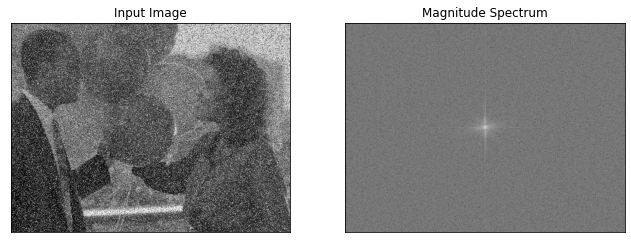

In [47]:
dft = cv2.dft(np.float32(image2),flags = cv2.DFT_COMPLEX_OUTPUT)

# shift the zero-frequncy component to the center of the spectrum
dft_shift = np.fft.fftshift(dft)

# save image of the image in the fourier domain.
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

# plot both images
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(image2, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

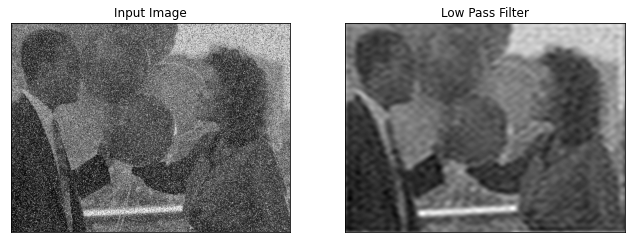

In [48]:
rows, cols = image2.shape
crow,ccol = rows//2 , cols//2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

# plot both images
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(image2, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Low Pass Filter'), plt.xticks([]), plt.yticks([])
plt.show()

In [49]:
def crimmins(data):
    new_image = data.copy()
    nrow = len(data)
    ncol = len(data[0])
    
    # Dark pixel adjustment
    
    # First Step
    # N-S
    for i in range(1, nrow):
        for j in range(ncol):
            if data[i-1,j] >= (data[i,j] + 2):
                new_image[i,j] += 1
    data = new_image
    # E-W
    for i in range(nrow):
        for j in range(ncol-1):
            if data[i,j+1] >= (data[i,j] + 2):
                new_image[i,j] += 1
    data = new_image
    # NW-SE
    for i in range(1, nrow):
        for j in range(1, ncol):
            if data[i-1,j-1] >= (data[i,j] + 2):
                new_image[i,j] += 1
    data = new_image
    #NE-SW
    for i in range(1, nrow):
        for j in range(ncol-1):
            if data[i-1,j+1] >= (data[i,j] + 2):
                new_image[i,j] += 1
    data = new_image
    # Second Step
    # N-S
    for i in range(1, nrow-1):
        for j in range(ncol):
            if (data[i-1,j] > data[i,j]) and (data[i,j] <= data[i+1,j]):
                new_image[i,j] += 1
    data = new_image
    # E-W
    for i in range(nrow):
        for j in range(1, ncol-1):
            if (data[i,j+1] > data[i,j]) and (data[i,j] <= data[i,j-1]):
                new_image[i,j] += 1
    data = new_image
    # NW-SE
    for i in range(1, nrow-1):
        for j in range(1, ncol-1):
            if (data[i-1,j-1] > data[i,j]) and (data[i,j] <= data[i+1,j+1]):
                new_image[i,j] += 1
    data = new_image
    # NE-SW
    for i in range(1, nrow-1):
        for j in range(1, ncol-1):
            if (data[i-1,j+1] > data[i,j]) and (data[i,j] <= data[i+1,j-1]):
                new_image[i,j] += 1
    data = new_image
    #Third Step
    # N-S
    for i in range(1, nrow-1):
        for j in range(ncol):
            if (data[i+1,j] > data[i,j]) and (data[i,j] <= data[i-1,j]):
                new_image[i,j] += 1
    data = new_image
    # E-W
    for i in range(nrow):
        for j in range(1, ncol-1):
            if (data[i,j-1] > data[i,j]) and (data[i,j] <= data[i,j+1]):
                new_image[i,j] += 1
    data = new_image
    # NW-SE
    for i in range(1, nrow-1):
        for j in range(1, ncol-1):
            if (data[i+1,j+1] > data[i,j]) and (data[i,j] <= data[i-1,j-1]):
                new_image[i,j] += 1
    data = new_image
    # NE-SW
    for i in range(1, nrow-1):
        for j in range(1, ncol-1):
            if (data[i+1,j-1] > data[i,j]) and (data[i,j] <= data[i-1,j+1]):
                new_image[i,j] += 1
    data = new_image
    # Fourth Step
    # N-S
    for i in range(nrow-1):
        for j in range(ncol):
            if (data[i+1,j] >= (data[i,j]+2)):
                new_image[i,j] += 1
    data = new_image
    # E-W
    for i in range(nrow):
        for j in range(1,ncol):
            if (data[i,j-1] >= (data[i,j]+2)):
                new_image[i,j] += 1
    data = new_image
    # NW-SE
    for i in range(nrow-1):
        for j in range(ncol-1):
            if (data[i+1,j+1] >= (data[i,j]+2)):
                new_image[i,j] += 1
    data = new_image
    # NE-SW
    for i in range(nrow-1):
        for j in range(1,ncol):
            if (data[i+1,j-1] >= (data[i,j]+2)):
                new_image[i,j] += 1
    data = new_image
    
    # Light pixel adjustment
    
    # First Step
    # N-S
    for i in range(1,nrow):
        for j in range(ncol):
            if (data[i-1,j] <= (data[i,j]-2)):
                new_image[i,j] -= 1
    data = new_image
    # E-W
    for i in range(nrow):
        for j in range(ncol-1):
            if (data[i,j+1] <= (data[i,j]-2)):
                new_image[i,j] -= 1
    data = new_image
    # NW-SE
    for i in range(1,nrow):
        for j in range(1,ncol):
            if (data[i-1,j-1] <= (data[i,j]-2)):
                new_image[i,j] -= 1
    data = new_image
    # NE-SW
    for i in range(1,nrow):
        for j in range(ncol-1):
            if (data[i-1,j+1] <= (data[i,j]-2)):
                new_image[i,j] -= 1
    data = new_image
    # Second Step
    # N-S
    for i in range(1,nrow-1):
        for j in range(ncol):
            if (data[i-1,j] < data[i,j]) and (data[i,j] >= data[i+1,j]):
                new_image[i,j] -= 1
    data = new_image
    # E-W
    for i in range(nrow):
        for j in range(1, ncol-1):
            if (data[i,j+1] < data[i,j]) and (data[i,j] >= data[i,j-1]):
                new_image[i,j] -= 1
    data = new_image
    # NW-SE
    for i in range(1,nrow-1):
        for j in range(1,ncol-1):
            if (data[i-1,j-1] < data[i,j]) and (data[i,j] >= data[i+1,j+1]):
                new_image[i,j] -= 1
    data = new_image
    # NE-SW
    for i in range(1,nrow-1):
        for j in range(1,ncol-1):
            if (data[i-1,j+1] < data[i,j]) and (data[i,j] >= data[i+1,j-1]):
                new_image[i,j] -= 1
    data = new_image
    # Third Step
    # N-S
    for i in range(1,nrow-1):
        for j in range(ncol):
            if (data[i+1,j] < data[i,j]) and (data[i,j] >= data[i-1,j]):
                new_image[i,j] -= 1
    data = new_image
    # E-W
    for i in range(nrow):
        for j in range(1,ncol-1):
            if (data[i,j-1] < data[i,j]) and (data[i,j] >= data[i,j+1]):
                new_image[i,j] -= 1
    data = new_image
    # NW-SE
    for i in range(1,nrow-1):
        for j in range(1,ncol-1):
            if (data[i+1,j+1] < data[i,j]) and (data[i,j] >= data[i-1,j-1]):
                new_image[i,j] -= 1
    data = new_image
    # NE-SW
    for i in range(1,nrow-1):
        for j in range(1,ncol-1):
            if (data[i+1,j-1] < data[i,j]) and (data[i,j] >= data[i-1,j+1]):
                new_image[i,j] -= 1
    data = new_image
    # Fourth Step
    # N-S
    for i in range(nrow-1):
        for j in range(ncol):
            if (data[i+1,j] <= (data[i,j]-2)):
                new_image[i,j] -= 1
    data = new_image
    # E-W
    for i in range(nrow):
        for j in range(1,ncol):
            if (data[i,j-1] <= (data[i,j]-2)):
                new_image[i,j] -= 1
    data = new_image
    # NW-SE
    for i in range(nrow-1):
        for j in range(ncol-1):
            if (data[i+1,j+1] <= (data[i,j]-2)):
                new_image[i,j] -= 1
    data = new_image
    # NE-SW
    for i in range(nrow-1):
        for j in range(1,ncol):
            if (data[i+1,j-1] <= (data[i,j]-2)):
                new_image[i,j] -= 1
    data = new_image
    return new_image.copy()

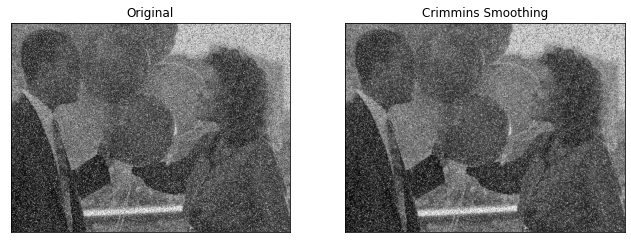

In [50]:
new_image = crimmins(image2)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Crimmins Smoothing')
plt.xticks([]), plt.yticks([])
plt.show()

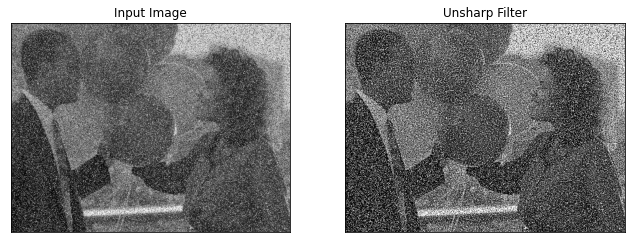

In [51]:
image2 = Image.fromarray(image2.astype('uint8'))
new_image = image2.filter(ImageFilter.UnsharpMask(radius=2, percent=150))

plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(image2, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(new_image, cmap = 'gray')
plt.title('Unsharp Filter'), plt.xticks([]), plt.yticks([])
plt.show()